### 3.sklearn代码实践

C:\Users\23361\AppData\Local\Temp/ipykernel_24776/2542954519.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
H:\software\code_tools\anaconda\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


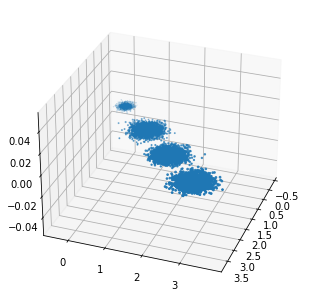

In [3]:
#首先我们生成随机数据并可视化
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.datasets import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

In [6]:
#我们先不降维，只对数据进行投影，看看投影后的三个维度的方差分布，代码如下：
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]


可以看出投影后三个特征维度的方差比例大约为98.3%：0.8%：0.8%。投影后第一个特征占了绝大多数的主成分比例。

In [7]:
#现在我们来进行降维，从三维降到2维，代码如下：
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.98318212 0.00850037]
[3.78521638 0.03272613]


这个结果其实可以预料，因为上面三个投影后的特征维度的方差分别为：[ 3.78483785 0.03272285 0.03201892]，投影到二维后选择的肯定是前两个特征，而抛弃第三个特征。

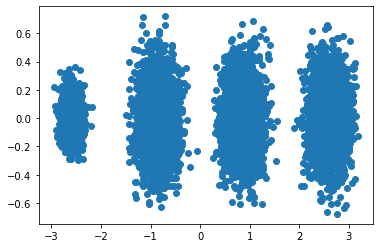

In [8]:
#为了有个直观的认识，我们看看此时转化后的数据分布，代码如下：
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

可见降维后的数据依然可以很清楚的看到我们之前三维图中的4个簇。

现在我们看看不直接指定降维的维度，而指定降维后的主成分方差和比例。

In [17]:
pca = PCA(n_components=0.95)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

[0.98318212]
[3.78521638]
1


In [18]:
pca = PCA(n_components=0.99)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

[0.98318212 0.00850037]
[3.78521638 0.03272613]
2


这个结果也很好理解，因为我们第一个主成分占了98.3%的方差比例，第二个主成分占了0.8%的方差比例，两者一起可以满足我们的阈值。

最后我们看看让MLE算法自己选择降维维度的效果，代码如下：

In [10]:
pca = PCA(n_components='mle')
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

[0.98318212]
[3.78521638]
1


可见由于我们的数据的第一个投影特征的方差占比高达98.3%，MLE算法只保留了我们的第一个特征。